In [302]:
import torch
from torch import nn
# from torch.utils.data import DataLoader
# from torchvision import datasets
from torchvision.transforms import ToTensor

import pandas as pd
import numpy as np


In [303]:
df = pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [304]:
df.drop(['Id'],axis=1,inplace=True)
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [305]:
X = df.drop(["Species"],axis=1).values
y = df['Species'].values

In [306]:
print(X.shape, y.shape)

(150, 4) (150,)


In [307]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [309]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [310]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [311]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer = nn.Linear(128,64)
        self.output_layer = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer(x))
        x = self.relu(self.output_layer(x))
        return x
        

In [312]:
input_dim = 4
num_classes = 3

model = NeuralNetwork(input_dim=input_dim, num_classes=num_classes)


In [313]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [314]:
num_epochs = 1500

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    output = model(X_train)
    train_loss = criterion(output, y_train)
    
    train_loss.backward()
    optimizer.step()
    
    output_tes = model(X_test)
    test_loss = criterion(output_tes, y_test)
    
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch 100/1500, Train Loss: 0.1123, Test Loss: 0.0855
Epoch 200/1500, Train Loss: 0.0645, Test Loss: 0.0464
Epoch 300/1500, Train Loss: 0.0526, Test Loss: 0.0352
Epoch 400/1500, Train Loss: 0.0467, Test Loss: 0.0295
Epoch 500/1500, Train Loss: 0.0429, Test Loss: 0.0265
Epoch 600/1500, Train Loss: 0.0400, Test Loss: 0.0251
Epoch 700/1500, Train Loss: 0.0374, Test Loss: 0.0234
Epoch 800/1500, Train Loss: 0.0351, Test Loss: 0.0220
Epoch 900/1500, Train Loss: 0.0329, Test Loss: 0.0211
Epoch 1000/1500, Train Loss: 0.0308, Test Loss: 0.0205
Epoch 1100/1500, Train Loss: 0.0287, Test Loss: 0.0200
Epoch 1200/1500, Train Loss: 0.0266, Test Loss: 0.0194
Epoch 1300/1500, Train Loss: 0.0245, Test Loss: 0.0187
Epoch 1400/1500, Train Loss: 0.0225, Test Loss: 0.0182
Epoch 1500/1500, Train Loss: 0.0206, Test Loss: 0.0177


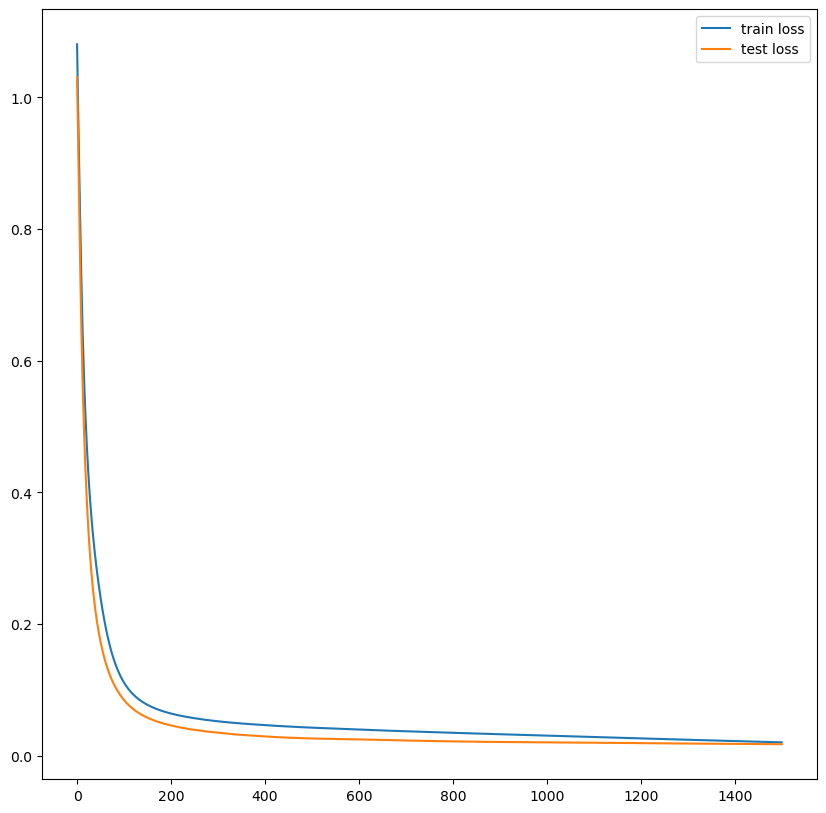

In [315]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [316]:
predict_out = model(X_test)
_, y_pred = torch.max(predict_out, 1)

In [317]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('prediction accuracy', accuracy_score(y_test.data, y_pred.data))

print( 'macro precision', precision_score(y_test.data, y_pred.data, average='macro'))
print('micro precision', precision_score(y_test.data, y_pred.data, average='micro'))
print('macro recall', recall_score(y_test.data, y_pred.data, average='macro'))
print('micro recall', recall_score(y_test.data, y_pred.data, average='micro'))

prediction accuracy 1.0
macro precision 1.0
micro precision 1.0
macro recall 1.0
micro recall 1.0
